In [47]:
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [65]:
data = np.load('./SMAI-Dataset-problem-4.3/colors.pkl',allow_pickle=True)

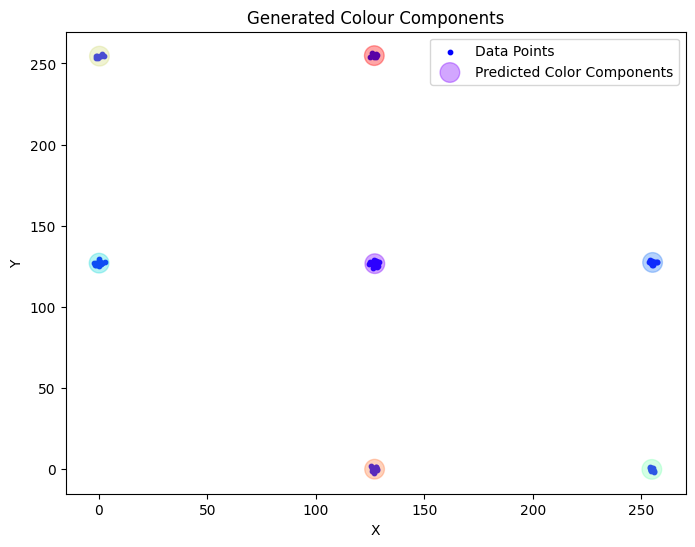

In [70]:
gmm = GaussianMixture(n_components=7, random_state=42)
gmm.fit(data)
cluster_assignments = gmm.means_

x_data = data[:, 0]  
y_data = data[:, 1]  

x_cluster = cluster_assignments[:, 0]
y_cluster = cluster_assignments[:, 1]
colors = plt.cm.rainbow(np.linspace(0, 1, 7))

alpha = 0.35
colors[:, 3] = alpha

custom_cmap = ListedColormap(colors)

plt.figure(figsize=(8, 6))
plt.scatter(x_data, y_data, s=10, c='blue', marker='o', label='Data Points')
plt.scatter(x_cluster, y_cluster, c=np.arange(len(x_cluster)), cmap=custom_cmap, s=200, label = 'Predicted Color Components')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Generated Colour Components')
plt.legend()
plt.show()

In [25]:
def generate_sample(num_components, means, cov, num_samples):
    data = []
    extra = num_samples % num_components
    for i in range(num_components):
        component_samples = np.random.multivariate_normal(means[i], cov[i], num_samples//7+extra)
        data.append(component_samples)
        if(extra>0):
            extra=extra-1
    
    return np.vstack(data)

In [61]:
means = gmm.means_
num_clusters = 7
covariances = gmm.covariances_

sample_data = generate_sample(num_clusters, means, covariances, 100)

print("The Sample Data generated is: ")
print()
print(sample_data)

The Sample Data generated is: 

[[ 1.25101491e+02  1.25702127e+02]
 [ 1.27442270e+02  1.27853722e+02]
 [ 1.26172919e+02  1.23718350e+02]
 [ 1.25731218e+02  1.29020856e+02]
 [ 1.27314166e+02  1.27750651e+02]
 [ 1.26906099e+02  1.27443785e+02]
 [ 1.28182830e+02  1.30086036e+02]
 [ 1.29201504e+02  1.26391894e+02]
 [ 1.24159272e+02  1.28048127e+02]
 [ 1.29363971e+02  1.29732739e+02]
 [ 1.27272745e+02  1.27698034e+02]
 [ 1.26894379e+02  1.23833040e+02]
 [ 1.27688432e+02  1.28040480e+02]
 [ 1.25616353e+02  1.24857031e+02]
 [ 1.27215342e+02  1.28749326e+02]
 [ 1.26672662e+02  1.26671730e+02]
 [ 2.54082454e+02  1.26627366e+02]
 [ 2.55660280e+02  1.26658554e+02]
 [ 2.54254276e+02  1.27817945e+02]
 [ 2.54891036e+02  1.28519749e+02]
 [ 2.54190500e+02  1.26860279e+02]
 [ 2.54525998e+02  1.28684012e+02]
 [ 2.55281081e+02  1.27008747e+02]
 [ 2.55055268e+02  1.28073244e+02]
 [ 2.55733845e+02  1.27466256e+02]
 [ 2.56427724e+02  1.27388403e+02]
 [ 2.53755728e+02  1.27485502e+02]
 [ 2.54916448e+02  1.26

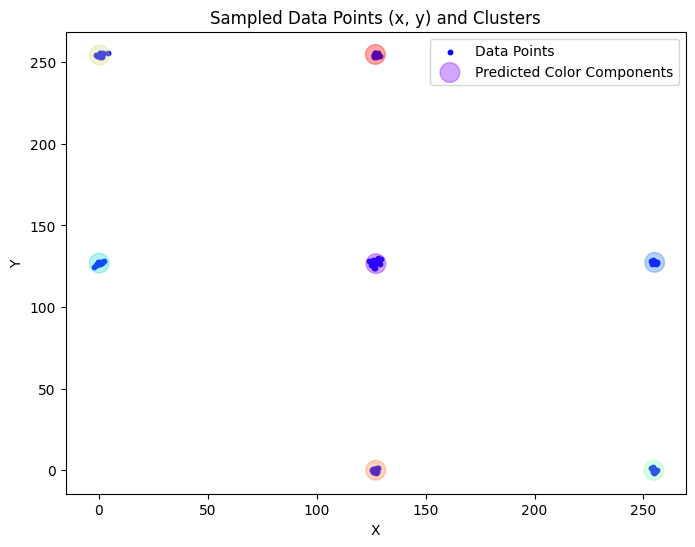

In [68]:
x_values = sample_data[:, 0]  
y_values = sample_data[:, 1]  

x_cluster = means[:, 0]
y_cluster = means[:, 1]
colors = plt.cm.rainbow(np.linspace(0, 1, num_clusters))

alpha = 0.35
colors[:, 3] = alpha

custom_cmap = ListedColormap(colors)

plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, s=10, c='blue', marker='o', label='Data Points')
plt.scatter(x_cluster, y_cluster, c=np.arange(len(x_cluster)), cmap=custom_cmap, s=200, label = 'Predicted Color Components')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Sampled Data Points (x, y) and Clusters')
plt.legend()
plt.show()

## Observations:

1) The mean of the sample observation is close to the mean of the component, indicating a typical value for that cluster.

2) Since we have multiple Gaussian components, the data generated from a particular component, that particular sample of data is going to belong to the cluster associated with that particular mean as observed by the plot also.

3) Each row in the means array represents the mean of a Gaussian component. The means represent the center or centroid of each Gaussian component in the 2D color space. In the context of color, means represent the most representative color for each component.